In [12]:
import pandas as pd
pd.options.display.max_columns = None # 显示所有列

In [13]:
# Read .csv
origin_data = pd.read_csv('duct.csv')
print(origin_data.shape)
origin_data.head()

(355, 46)


,malignant,bilateral,age,month,height,weight,bmi,diabetes,hypertension,surgery,smoking,famhis2,family,menarche,mensperiod,menopause,menregular,miscarriage,pregnancy,childbearing,disnature,dischange,disnumber,intraductalmass,position,distance,shape,surface,status,quantity,distribution,retraction,appearance,ductectasia,numintramass,numcysmass,nummass,ussize,usposition,usdistance,usshape,usboundary,bloodflow,bloodflow2,calcification,birads
0,1,0,32,18.00,167,78,28.0,0,0,0,0,2,0,13,5,0,1,0,1,1,1,0,0,1,2,2,1,1,2,1,1,0,0,1,0,0,1,3,2,1,2,1,1,1,0,1
1,1,1,42,7.00,156,57,23.4,0,1,1,0,0,0,14,4,0,0,2,3,1,2,0,1,1,6,2,1,1,0,2,2,0,0,1,0,0,2,1,1,1,1,1,1,1,0,1
2,1,0,61,0.75,163,65,24.5,0,0,0,1,0,0,17,5,1,0,2,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,2,3,1,1,2,2,2,3,0,2
3,1,0,39,6.00,160,65,25.4,0,0,0,0,3,0,16,6,0,0,1,2,1,1,1,0,1,3,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,69,0.50,156,67,27.5,1,1,0,0,0,0,13,4,1,0,0,1,1,1,0,0,1,2,2,1,1,0,1,1,0,0,1,1,0,2,1,5,1,1,1,1,1,0,2


In [14]:
# Preprocessing Data

data = pd.DataFrame()

colnames = origin_data.columns # 保存原始列顺序


# 临床资料
data[['malignant','bilateral','height','weight','bmi']] = origin_data[['malignant','bilateral','height','weight','bmi']]

data[['diabetes','hypertension','surgery','smoking','family']] = origin_data[['diabetes','hypertension','surgery','smoking','family']]

data[['menarche','menopause','miscarriage','pregnancy','childbearing']] = origin_data[['menarche','menopause','miscarriage','pregnancy','childbearing']]

data[['famhis2','mensperiod','menregular']] = origin_data[['famhis2','mensperiod','menregular']]

data['age'] = pd.cut(origin_data['age'], [0,35,50,100], right=False, labels=[0,1,2]).astype('int64') # 0-34=0, 35-49=1,50-100=2

data['month'] = pd.cut(origin_data['month'], [0,6,350], right=False, labels=[0,1]).astype('int64') # 0-6=0, 6-max=1

# 乳管镜

data['disnature'] = [x if x!=4 else 0 for x in origin_data['disnature']] # 混合性 4 变为 0 

data[['dischange','disnumber']] = origin_data[['dischange','disnumber']]

data[['intraductalmass','position','distance']] = origin_data[['intraductalmass','position','distance']]

data[['shape','surface','status','quantity','distribution']] = origin_data[['shape','surface','status','quantity','distribution']]

data[['appearance','retraction']] = origin_data[['appearance','retraction']]

# 超声表现

data[['ductectasia','numintramass','numcysmass','nummass']] = origin_data[['ductectasia','numintramass','numcysmass','nummass']]

data[['ussize','usposition','usdistance','usshape','usboundary']] = origin_data[['ussize','usposition','usdistance','usshape','usboundary']] # 有怀疑的，按着分级最高，最怀疑的肿物来的。不怀疑的，是按着最大的来的。

data[['bloodflow','calcification','birads']] = origin_data[['bloodflow','calcification','birads']]

data['bloodflow2'] = origin_data['bloodflow2'] # 拟删除列

data = data[colnames] # 原始列顺序

data.drop(['famhis2','bloodflow2'], axis=1, inplace=True) # 删除无意义列

print(data.shape)

data.head()

(355, 44)


,malignant,bilateral,age,month,height,weight,bmi,diabetes,hypertension,surgery,smoking,family,menarche,mensperiod,menopause,menregular,miscarriage,pregnancy,childbearing,disnature,dischange,disnumber,intraductalmass,position,distance,shape,surface,status,quantity,distribution,retraction,appearance,ductectasia,numintramass,numcysmass,nummass,ussize,usposition,usdistance,usshape,usboundary,bloodflow,calcification,birads
0,1,0,0,1,167,78,28.0,0,0,0,0,0,13,5,0,1,0,1,1,1,0,0,1,2,2,1,1,2,1,1,0,0,1,0,0,1,3,2,1,2,1,1,0,1
1,1,1,1,1,156,57,23.4,0,1,1,0,0,14,4,0,0,2,3,1,2,0,1,1,6,2,1,1,0,2,2,0,0,1,0,0,2,1,1,1,1,1,1,0,1
2,1,0,2,0,163,65,24.5,0,0,0,1,0,17,5,1,0,2,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,2,3,1,1,2,2,2,0,2
3,1,0,1,1,160,65,25.4,0,0,0,0,0,16,6,0,0,1,2,1,1,1,0,1,3,1,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,2,0,156,67,27.5,1,1,0,0,0,13,4,1,0,0,1,1,1,0,0,1,2,2,1,1,0,1,1,0,0,1,1,0,2,1,5,1,1,1,1,0,2


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   malignant        355 non-null    int64  
 1   bilateral        355 non-null    int64  
 2   age              355 non-null    int64  
 3   month            355 non-null    int64  
 4   height           355 non-null    int64  
 5   weight           355 non-null    int64  
 6   bmi              355 non-null    float64
 7   diabetes         355 non-null    int64  
 8   hypertension     355 non-null    int64  
 9   surgery          355 non-null    int64  
 10  smoking          355 non-null    int64  
 11  family           355 non-null    int64  
 12  menarche         355 non-null    int64  
 13  mensperiod       355 non-null    int64  
 14  menopause        355 non-null    int64  
 15  menregular       355 non-null    int64  
 16  miscarriage      355 non-null    int64  
 17  pregnancy       

In [23]:
from pycaret.classification import *
model = setup(data=data, target = 'malignant', train_size=0.85)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,324
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(355, 44)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,40
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [24]:
# comparing all models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.800600,0.791600,0.431900,0.747500,0.533800,0.419600
1,Light Gradient Boosting Machine,0.787500,0.753700,0.456900,0.675500,0.532400,0.403100
2,Extra Trees Classifier,0.787200,0.769000,0.405600,0.726700,0.502400,0.380800
3,Extreme Gradient Boosting,0.787200,0.746100,0.430600,0.689600,0.518100,0.391500
4,Random Forest Classifier,0.787100,0.769900,0.355600,0.720000,0.459400,0.350100
5,Ridge Classifier,0.763900,0.000000,0.405600,0.684300,0.467700,0.332500
6,Gradient Boosting Classifier,0.760600,0.758000,0.431900,0.617600,0.488400,0.341100
7,Logistic Regression,0.757300,0.743700,0.454200,0.620500,0.503800,0.349300
8,Linear Discriminant Analysis,0.757200,0.739200,0.430600,0.658300,0.476500,0.332800
9,Ada Boost Classifier,0.750400,0.721800,0.404200,0.578600,0.459800,0.306100


In [25]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8065,0.8081,0.4444,0.8000,0.5714,0.4593
1,0.7667,0.6477,0.2500,0.6667,0.3636,0.2553
2,0.7333,0.8011,0.3750,0.5000,0.4286,0.2593
3,0.8333,0.8864,0.3750,1.0000,0.5455,0.4681
4,0.8000,0.8466,0.6250,0.6250,0.6250,0.4886
5,0.8333,0.7330,0.5000,0.8000,0.6154,0.5161
6,0.8000,0.8011,0.5000,0.6667,0.5714,0.4444
7,0.8000,0.7273,0.5000,0.6667,0.5714,0.4444
8,0.8333,0.8693,0.3750,1.0000,0.5455,0.4681
9,0.8000,0.7955,0.3750,0.7500,0.5000,0.3919


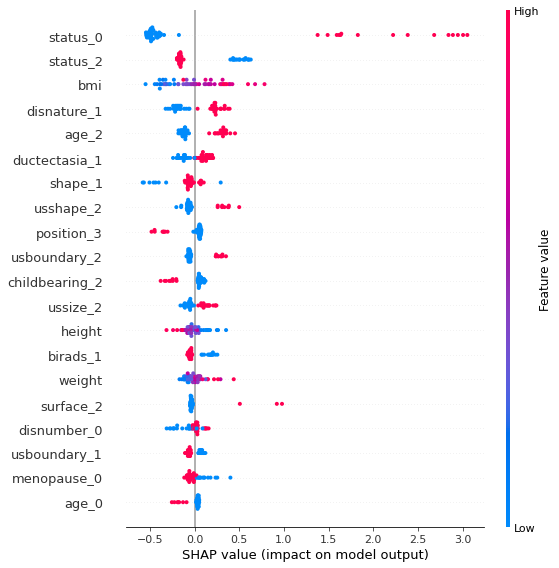

In [26]:
interpret_model(catboost)

In [27]:
pred_holdout = predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.8519,0.8906,0.5333,0.8889,0.6667,0.5789
